In [11]:
# Import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

### Reading the dataset

In [12]:
# Read the file "Boston_housing.csv" as a dataframe
df = pd.read_csv("Boston_housing.csv")

## Predictors & Response variables

Select the following columns as predictors
- crim
- indus
- nox
- rm
- age
- dis
- rad
- tax
- ptratio
- black
- lstat

#### Select the 'medv' column as response variable

In [18]:
# Select a subdataframe of predictors
X = df[['crim','indus','nox','rm','age','dis','rad','tax','ptratio','black','lstat']]

# Normalize the values of the dataframe to avoid computational issues with predictor magnitudes too large or too small
x = preprocessing.normalize(X)

# Select the response variable
y = df['medv']

### Split the dataset into train and validation sets

In [19]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=31)


### Multi-Linear Regression Analysis

In [20]:
#Fit a linear regression model
lreg = LinearRegression()
#Fit on the training set
lreg.fit(X_train, y_train)
# Predict on the validation set
yval_pred = lreg.predict(X_val)

### Computing the MSE for Polynomial Regression

In [21]:
# Use the mean_squared_error function to compute the mse & print it
mse = mean_squared_error(y_val, yval_pred)
print ("Multi linear regression MSE is", mse)

Multi linear regression MSE is 20.133951375165264


### Obtaining the coefficients of the predictors

In [22]:
coef = dict(zip(X.columns, np.transpose(lreg.coef_))) 
l1 = list(coef.keys())
l2 = list(coef.values())


### Plotting the graph
This bar graph is to depict the coefficient of each predictor for the given degree

In [ ]:
# Use the helper code below to visualise your coefficients
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(l1,l2, align='center',color="#336600")
ax.grid(linewidth=0.2)
ax.set_xlabel("Coefficient")
ax.set_ylabel("Predictors")
ax.set_xlim(-7000,4000)
plt.show()

### Implementing Lasso regularization

In [20]:
# Now, you will implement the lasso regularisation
lasso_reg = Lasso(alpha =0.001)
lasso_reg.fit(X_train,y_train)

#Make a prediction using the above trained model
y_pred =lasso_reg.predict(X_val)


### Computing the MSE with Lasso regularization

In [21]:
# Again, calculate the MSE & print it
mse_lasso = mean_squared_error(y_pred, y_val)
print ("Lasso MSE is", mse_lasso)

Lasso MSE is 19.920431176338706


### Obtaining the coefficients of the predictors

In [23]:
# Use the helper code below to make a dictionary of the predictors along with the coefficients associated with them
coef = dict(zip(X.columns, np.transpose(lasso_reg.coef_))) 
l1 = list(coef.keys())
l2 = list(coef.values())

### Plotting the graph

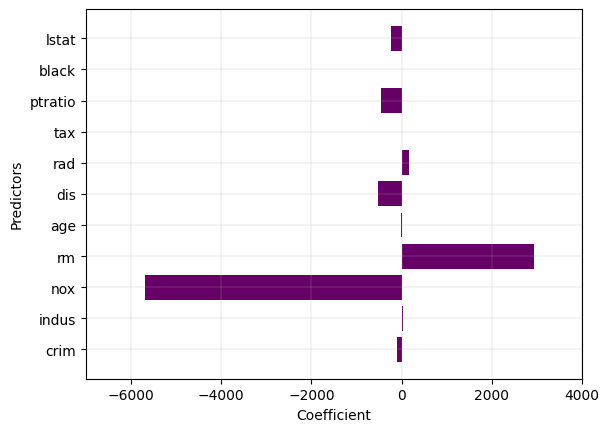

In [24]:
# Use the helper code below to visualise the values 
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(l1,l2, align='center',color="#660066")
ax.grid(linewidth=0.2)
ax.set_xlabel("Coefficient")
ax.set_ylabel("Predictors")
ax.set_xlim(-7000,4000)
plt.show()

### Implementing Ridge regularization

In [25]:
# Now, we do the same as above, but we use L2 regularisation
ridgeReg = Ridge(alpha=0.001)

ridgeReg.fit(X_train,y_train)

y_pred = ridgeReg.predict(X_val)


### Computing the MSE with Ridge regularization

In [26]:
# Calculate the MSE & print it
mse_ridge = mean_squared_error(y_pred, y_val)
print ("Ridge MSE is", mse_ridge)

Ridge MSE is 20.09085131720043


### Obtaining the coefficients of the predictors

In [27]:
# Use the helper code below to make a dictionary of the predictors along with the coefficients associated with them 
coef = dict(zip(X.columns, np.transpose(ridgeReg.coef_))) 
l1 = list(coef.keys())
l2 = list(coef.values())

### Plotting the graph

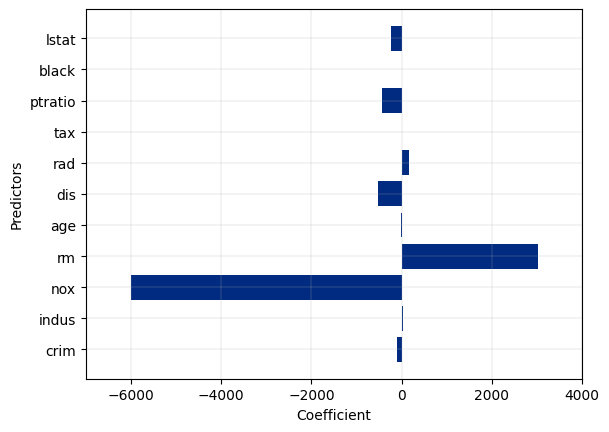

In [28]:
# Again, use the helper code to visualise your results
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(l1,l2, align='center',color="#002b80")
ax.grid(linewidth=0.2)
ax.set_xlabel("Coefficient")
ax.set_ylabel("Predictors")
ax.set_xlim(-7000,4000)
plt.show()